# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: 

Дата выдачи: <span style="color:red">__20 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__6 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2024`

In [52]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

Перепишем формулу для $y_i$ в векторном виде:
$$y_i = \gamma \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}} + \delta $$
Считаем, что $\mathcal{L} = \mathcal{L}(y(X, \gamma, \delta))$, тогда:
1. $\nabla_{\gamma} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot \frac{X - \mu}{\sqrt{\sigma^2 + \varepsilon}}$
2. $\nabla_{\delta} {\mathcal L} = (\nabla_{y} {\mathcal L})^T \cdot (1)_{i=1}^{n} = \sum_{i=1}^n (\nabla_{y} {\mathcal L})_i$
3. $\nabla_{X} {\mathcal L} = \nabla_{y} {\mathcal L} \cdot \frac{\gamma}{\sqrt{\sigma^2 + \varepsilon}}$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

...

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

На практике, зачастую, используются именно глубокие нейронные сети. 
Из курса лекций известно, что $\sup_{y \in \mathbb{R}} \left| \frac{d \, \sigma}{d \, y} (y) \right| = \frac{1}{4}$.
Рассмотрим глубокую сеть с $d$ слоями: ДОПИСАТЬ
Тогда будет наблюдаться затухание градиента

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [53]:
from numpy.typing import NDArray
from typing import Tuple, List, Union

In [107]:
class Layer:
    def __init__(self):
        self.params = []
        self.input = None
        
    def forward(self, input: NDArray) -> NDArray:
        raise NotImplementedError("forward method not implemented")
    
    def backward(self, grad_output: NDArray) -> Tuple[NDArray, NDArray]:
        raise NotImplementedError("backward method not implemented")
    
    def __call__(self, input: NDArray) -> NDArray:
        return self.forward(input)

In [55]:
class IdentityLayer(Layer):
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [56]:
class ReLU(Layer):
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters
        self.input = None

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        
        # max(0, x) = 1/2 (x + |x|)
        
        self.input = input
        
        return np.maximum(0, input)
        
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        
        if self.input is None:
            raise RuntimeError('Call forward method before calling backward')
        
        # print(f"{grad_output.shape=}")
        
        return np.where(self.input > 0, grad_output, np.zeros_like(self.input)), []
    
    def __repr__(self):
        return 'Relu()'

In [57]:
arr = np.array([
    [1, 2],
    [-1, 3],
    [-2, -1]
])

np.where(arr > 0, np.ones_like(arr), np.zeros_like(arr))

array([[1, 1],
       [0, 1],
       [0, 0]])

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [58]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [59]:
class Dense(Layer):
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.2
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        
        self.input = input
        
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        
        # print(f"DEBUG: {(self.input[:, :, None] @ grad_output[:, None, :]).shape=}")
        d_loss_d_w = self.input[:, :, None] @ grad_output[:, None, :]
        d_loss_d_b = grad_output
        d_loss_d_x = grad_output @ self.weights.T
        
        return d_loss_d_x, [d_loss_d_w, d_loss_d_b]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

In [60]:
x = np.array([1, 2, 3])
y = np.array([10, 20])

x[:, None] @ y[None, :]

array([[10, 20],
       [20, 40],
       [30, 60]])

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [61]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:
Пусть $x = (x_1, \ldots, x_n)$

$$ f(x) = \sum_i \left( ReLU(x) \right)_i = \sum_i max(0, x_i)$$
$$f: \mathbb{R} ^ {n \times m} \to \mathbb{R}^{m}$$

$$\nabla_{x} f = \chi (x), \text{где } \chi (s) = \begin{cases} 1 \; & s > 0 \\ 0 \; & s \le 0 \end{cases}$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [62]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

# print(relu.forward(points).shape)

### your code here

def f(x):
    out = relu.forward(x)
    return np.sum(out, axis=1)

f(points)
grads = relu.backward(np.ones((10, 12)))[0]
grads
# numeric_grads = eval_numerical_gradient(f, points, verbose=True)
numeric_grads = np.zeros_like(points)
for i in range(points.shape[0]):
    numeric_grads[i, :] = eval_numerical_gradient(f, points[i, :].reshape((1, -1)), verbose=False)

print(f"{grads.shape=}\t{numeric_grads.shape=}")

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

grads.shape=(10, 12)	numeric_grads.shape=(10, 12)


C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\1145296279.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[ix] = (fxph - fxmh) / (2 * h) # the slope


Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

...

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [63]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

def foo(x):
    out = linear.forward(x)
    return np.sum(out, axis=1)

foo(points)
grads = linear.backward(np.ones((10, 32)))[0]

numeric_grads = np.zeros_like(points)
for i in range(10):
    numeric_grads[i, :] = eval_numerical_gradient(foo, points[i, :].reshape((1, -1)), verbose=False)

print(f"{grads.shape=}\t{numeric_grads.shape=}")

# grads - numeric_grads

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0), np.max(np.abs(grads - numeric_grads))

grads.shape=(10, 12)	numeric_grads.shape=(10, 12)


C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\1145296279.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[ix] = (fxph - fxmh) / (2 * h) # the slope


#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [64]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [65]:
class LogSoftmax:
    def __init__(self):
        self.params = []
        self.input = None

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        
        return input - logsumexp(input, axis=-1, keepdims=True)
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        
        if self.input is None:
            raise RuntimeError('Call forward method before calling backward')
        
        exp_arr = np.exp(self.input)
        
        exp_sum = np.sum(exp_arr, axis=-1, keepdims=True)
        grad_output_sum = np.sum(grad_output, axis=-1, keepdims=True)
        
        d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)
        
        return d_loss_d_x, []
        
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [66]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    
    return -np.mean(activations[np.arange(len(target)), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    
    ohe_target = np.zeros_like(activations)
    ohe_target[np.arange(len(target)), target] = 1
    
    return -(ohe_target - np.exp(activations)) / len(target)

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [67]:
n = 50
d = 10
lsm = LogSoftmax()
np.random.seed(42)
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

### your code here

def foo(x):
    # print(f"{x.shape=}")
    return NLL(lsm.forward(x), target)

pred = lsm.forward(points)
NLL(pred, target)
f(points[0, :].reshape((1, -1)))
grads, _ = lsm.backward(grad_NLL(pred, target))

numeric_grads = eval_numerical_gradient(foo, points, verbose=False)

# np.max(np.abs(grads - numeric_grads))

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
from sklearn.datasets import load_digits

In [70]:
X, y = load_digits(return_X_y=True)

In [71]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [75]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [76]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [77]:
def forward(network: List[Layer], X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    
    for layer in network:
        X = layer.forward(X)
    
    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [78]:
def predict(network: List[Layer], X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    
    pred = forward(network, X)
    
    return np.argmax(pred, axis=1, keepdims=True)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [79]:
from scipy.optimize import minimize

In [80]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [81]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [82]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    
    set_weights(weights, network)
    
    activations = forward(network, X)
    loss = NLL(activations, y)
    
    weights_grad_arrays = []
    
    d_loss_d_input = grad_NLL(activations, y)
    for layer in reversed(network):
        d_loss_d_input, d_loss_d_layer = layer.backward(d_loss_d_input)
        if isinstance(layer, Dense):
            # print(f"{layer=}\tdW shape = {d_loss_d_layer[0].shape}\tdb shape = {d_loss_d_layer[1].shape}")
            # weights_grad += (np.sum(d_loss_d_layer[0], axis=0).ravel().tolist())
            # weights_grad += (np.sum(d_loss_d_layer[1], axis=0).ravel().tolist())
            weights_grad_arrays.append(np.sum(d_loss_d_layer[1], axis=0).ravel().tolist())
            weights_grad_arrays.append(np.sum(d_loss_d_layer[0], axis=0).ravel().tolist())
        else:
            pass
            # print(f"{layer=}")
        # weights_grad += d_loss_d_layer
    
    # print(f"Total: {len(weights_grad)=}")
    # print(weights_grad)
    
    weights_grad_arrays.reverse()
    weights_grad = []
    for wg in weights_grad_arrays:
        weights_grad += wg
    
    print(f"Mean abs grad value: {np.mean(np.abs(weights_grad))}\tMax abs grad value: {np.max(np.abs(weights_grad))}")
    print(f"Loss = {loss}")
    
    return loss, np.array(weights_grad)

Теперь мы готовы обучать нашу нейросеть. 

In [150]:
network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
weights = get_weights(network)
weights

array([-0.01558455,  0.10991486,  0.30178378, ...,  0.        ,
        0.        ,  0.        ])

In [151]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                    # optimization method
    jac=True,                         # says that gradient is computed in fun,
    options={'disp': True},
    tol=1e-3
)

Mean abs grad value: 0.4214577568105139	Max abs grad value: 16.462828516653765
Loss = 14.568787348486465
Mean abs grad value: 0.14178112812665214	Max abs grad value: 3.8588409221104962
Loss = 6.475501451901875
Mean abs grad value: 0.05408952309845467	Max abs grad value: 1.0569712840718908
Loss = 3.5578327882174543
Mean abs grad value: 0.03343406926233124	Max abs grad value: 0.6346309579661024
Loss = 2.753854835718728
Mean abs grad value: 0.017854382737503033	Max abs grad value: 0.27805329795772504
Loss = 2.0404268761206343
Mean abs grad value: 0.014611481562962183	Max abs grad value: 0.3211833933769238
Loss = 1.7185331126330563
Mean abs grad value: 0.015696247245792654	Max abs grad value: 0.3244925057502801
Loss = 1.3749186903633484
Mean abs grad value: 0.01694247947948577	Max abs grad value: 0.37921694850605236
Loss = 1.079926982059569
Mean abs grad value: 0.04278705855581392	Max abs grad value: 1.590086865095571
Loss = 1.034198796273862
Mean abs grad value: 0.016482836370300253	Max a

In [152]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [153]:
res["nit"] # number of iterations (should be >> 10)

48

In [154]:
res["success"] # should be True

True

In [155]:
res["message"]

'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

In [156]:
res["x"] # leraned weights

array([-0.01558455,  0.10991486,  0.30178378, ...,  0.04724234,
       -0.02339585,  0.13044205])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

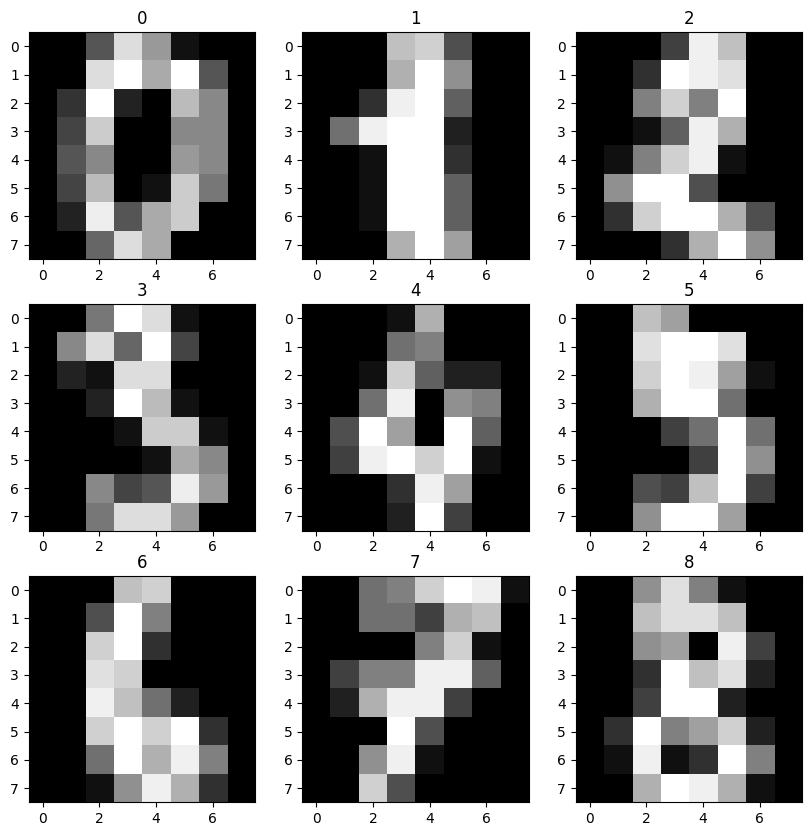

In [157]:
_, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i in range(9):
    ax[divmod(i, 3)].imshow(X[i, :].reshape((8, 8)), cmap=plt.get_cmap("gray"))
    ax[divmod(i, 3)].set_title(y[i])

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
network

[Dense(64, 32),
 Relu(),
 Dense(32, 32),
 Relu(),
 Dense(32, 32),
 Relu(),
 Dense(32, 10),
 LogSoftmax()]

In [160]:
set_weights(weights=res["x"], network=network)

train_NLL = NLL(forward(network, X_train), y_train)
test_NLL = NLL(forward(network, X_test), y_test)

print(f"Train NLL: {train_NLL:.7f}\t\tTest NLL: {test_NLL:.7f}")

train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))

print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

Train NLL: 0.0059631		Test NLL: 0.2531723
Train accuracy: 1.000		Test accuracy: 0.951


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [161]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        self.train_NLL = []
        self.test_NLL = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        
        train_NLL = NLL(forward(network, X_train), y_train)
        test_NLL = NLL(forward(network, X_test), y_test)
        
        train_accuracy = accuracy_score(y_true=y_train, y_pred=predict(network, X_train))
        test_accuracy = accuracy_score(y_true=y_test, y_pred=predict(network, X_test))
        
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        self.train_NLL.append(train_NLL)
        self.test_NLL.append(test_NLL)
        
        if self.print:
            print(f"Train accuracy: {train_accuracy:.3f}\t\tTest accuracy: {test_accuracy:.3f}")

In [162]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Mean abs grad value: 0.4214577568105139	Max abs grad value: 16.462828516653765
Loss = 14.568787348486465
Mean abs grad value: 0.14178112812665214	Max abs grad value: 3.8588409221104962
Loss = 6.475501451901875
Train accuracy: 0.053		Test accuracy: 0.064
Mean abs grad value: 0.05408952309845467	Max abs grad value: 1.0569712840718908
Loss = 3.5578327882174543
Train accuracy: 0.183		Test accuracy: 0.169
Mean abs grad value: 0.03343406926233124	Max abs grad value: 0.6346309579661024
Loss = 2.753854835718728
Train accuracy: 0.203		Test accuracy: 0.182
Mean abs grad value: 0.017854382737503033	Max abs grad value: 0.27805329795772504
Loss = 2.0404268761206343
Train accuracy: 0.310		Test accuracy: 0.269
Mean abs grad value: 0.014611481562962183	Max abs grad value: 0.3211833933769238
Loss = 1.7185331126330563
Train accuracy: 0.474		Test accuracy: 0.422
Mean abs grad value: 0.015696247245792654	Max abs grad value: 0.3244925057502801
Loss = 1.3749186903633484
Train accuracy: 0.602		Test accuracy:

Изобразите на графике кривую качества на обучени и контроле по итерациям:

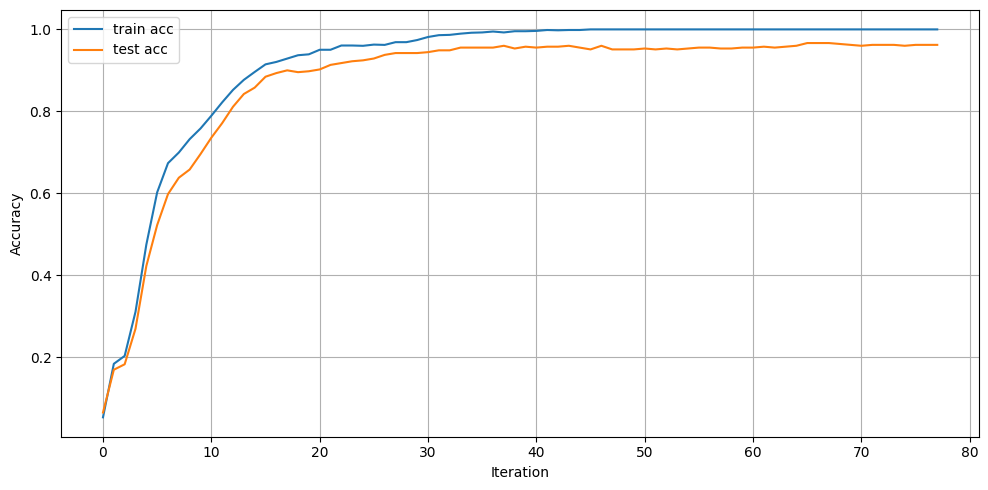

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [164]:
network

[Dense(64, 32),
 Relu(),
 Dense(32, 32),
 Relu(),
 Dense(32, 32),
 Relu(),
 Dense(32, 10),
 LogSoftmax()]

In [165]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [179]:
def train_network(network: List[Layer], history: bool = False) -> List[Layer]:
    cb = Callback(network, X_train, y_train, X_test, y_test, print=True) if history else lambda *args: None

    weights = get_weights(network)
    res = minimize(
        compute_loss_grad, weights,  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    
    if not res["success"]:
        raise RuntimeError(f"Optimization failure: {res['message']}")
    
    if history:
        return network, cb
    else:
        return network

In [186]:
np.random.seed(42)

for i, layer_c in zip(range(5), range(1, 5+1)):
    for j in range(5):
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Mean abs grad value: 0.3571221491939798	Max abs grad value: 2.336214662771033
Loss = 11.30880755523398
Mean abs grad value: 0.4944266121999155	Max abs grad value: 3.418783524981766
Loss = 10.444915503731194
Train accuracy: 0.221		Test accuracy: 0.227
Mean abs grad value: 0.31998064088744244	Max abs grad value: 2.024138457038147
Loss = 7.139882817086166
Train accuracy: 0.319		Test accuracy: 0.287
Mean abs grad value: 0.34616119845887044	Max abs grad value: 2.3376882697474515
Loss = 5.548641803814539
Train accuracy: 0.385		Test accuracy: 0.342
Mean abs grad value: 0.7622023934038692	Max abs grad value: 6.365396934678746
Loss = 12.921513671694173
Mean abs grad value: 0.3444760655151441	Max abs grad value: 2.14122320199354
Loss = 4.010812099840388
Train accuracy: 0.405		Test accuracy: 0.360
Mean abs grad value: 0.769806518596728	Max abs grad value: 8.887323264071467
Loss = 26.04858501489844
Mean abs grad value: 0.2388333984761071	Max abs grad value: 2.0589929894196635
Loss = 3.287100588618

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

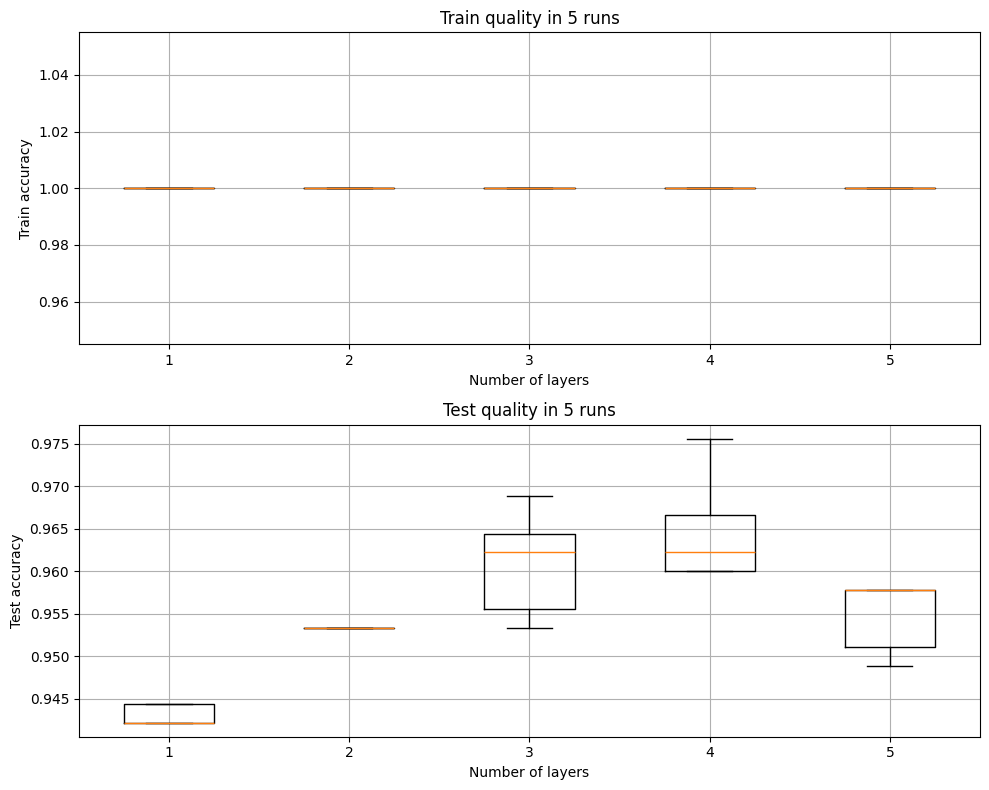

In [187]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

Линейная модель показывает худший результат среди изученных моделей. 
На обучающей выборке модели стабильно получают точность, сравнимую с 1.
На валидационной выборке модели получают качество на несколько процентов хуже, чем на тренировочной. 

Оптимальное число слоев --- 3 или 4 слоя. 
При числе слоёв > 4 начинает усиляться переобучение

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [188]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                # assert False, "NOT IMPLEMENTED"
                sigma = 2 / layer.weights.shape[0]
                layer.weights = np.random.normal(loc=0, scale=sigma, size=layer.weights.shape)
            elif initialization == 'Xavier':
                sigma = np.sqrt(2 / (layer.weights.shape[0] + layer.weights.shape[1]))
                layer.weights = np.random.normal(loc=0, scale=sigma, size=layer.weights.shape)
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [241]:
init_vars = [0.1, 0.1, 0.1, 'Kaiming', 'Xavier']

In [242]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [243]:
np.random.seed(42)
layer_c = 3

for i, initialization in enumerate(init_vars):
    for j in range(5):
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, initialization)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Mean abs grad value: 0.023923768689335115	Max abs grad value: 0.5397984325402326
Loss = 2.4779531700741524
Mean abs grad value: 0.035488186245531385	Max abs grad value: 2.390627413824082
Loss = 2.8451854848853926
Mean abs grad value: 0.015596342272377972	Max abs grad value: 0.335033009673193
Loss = 2.2119403833879416
Train accuracy: 0.145		Test accuracy: 0.158
Mean abs grad value: 0.011384368824348848	Max abs grad value: 0.16998866494416282
Loss = 2.051751330896222
Train accuracy: 0.302		Test accuracy: 0.307
Mean abs grad value: 0.013350123675796148	Max abs grad value: 0.2766089807625004
Loss = 1.81918908115332
Train accuracy: 0.511		Test accuracy: 0.522
Mean abs grad value: 0.017926759308805173	Max abs grad value: 0.38309495066552585
Loss = 1.5348455848459432
Train accuracy: 0.570		Test accuracy: 0.556
Mean abs grad value: 0.05383427698282178	Max abs grad value: 1.47703371087681
Loss = 1.4046945705353011
Mean abs grad value: 0.021327574602466197	Max abs grad value: 0.4708283059264033


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

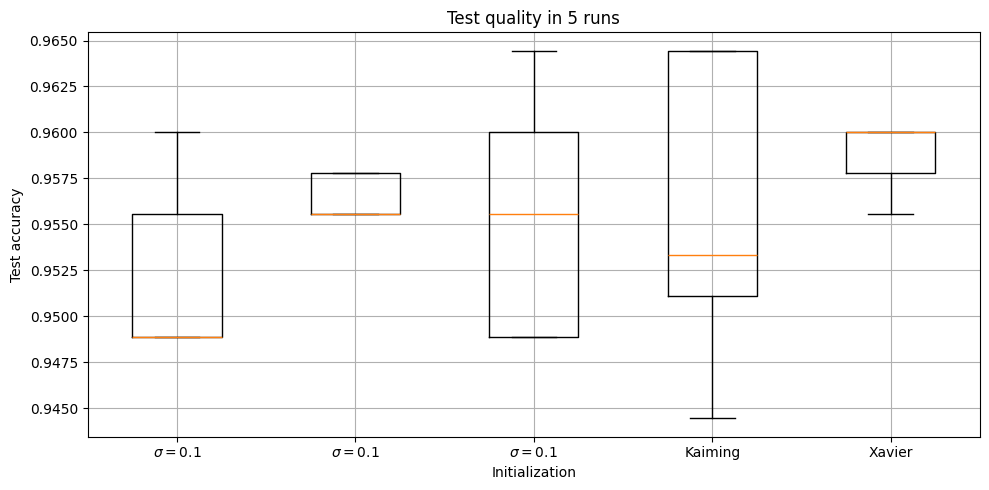

In [244]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [245]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [246]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [247]:
np.random.seed(42)
layer_c = 4

for i, initialization in enumerate(init_vars):
    for j in range(5):
        print(f"{i=}\t{j=}\t{initialization=}")
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, initialization)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

i=0	j=0	initialization=0.005
Mean abs grad value: 9.559657817249505e-06	Max abs grad value: 0.006458617202591516
Loss = 2.302585229058628
Mean abs grad value: 6.707701275360539e-05	Max abs grad value: 0.05155114520628095
Loss = 2.3393123177987616
Mean abs grad value: 9.435237731257514e-07	Max abs grad value: 0.00015939585638346658
Loss = 2.301851735437856
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 8.31643443694366e-07	Max abs grad value: 1.3748192284922854e-05
Loss = 2.3018512958430275
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 8.737029677500764e-07	Max abs grad value: 3.2533876979763896e-05
Loss = 2.3018511384890004
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 1.6171523908760934e-06	Max abs grad value: 0.0003197167073984718
Loss = 2.301849737706458
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 3.245206469397325e-06	Max abs grad value: 0.0004603266431600277
Loss = 2.301847454854146
Train accuracy: 0.106	

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 0.008949356622054703	Max abs grad value: 0.3318351740792522
Loss = 2.2865113740639513
Train accuracy: 0.171		Test accuracy: 0.160
i=0	j=1	initialization=0.005
Mean abs grad value: 1.0027355918952552e-05	Max abs grad value: 0.00645907865684476
Loss = 2.3025853156520713
Mean abs grad value: 6.780909175636713e-05	Max abs grad value: 0.05165831413432402
Loss = 2.3393755790670534
Mean abs grad value: 1.4138114616817051e-06	Max abs grad value: 0.00048754802693298967
Loss = 2.301851380415278
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 1.1619093417818624e-06	Max abs grad value: 0.00012084644353732177
Loss = 2.301850727435506
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 1.2605503843588733e-06	Max abs grad value: 0.00015988352941333784
Loss = 2.3018505201941415
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 1.3686699917731484e-06	Max abs grad value: 5.943520628102537e-05
Loss = 2.3018498085669874
Train accuracy: 0.10

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 0.00037400772353482535	Max abs grad value: 0.06863480817540205
Loss = 2.3006177479189778
Train accuracy: 0.099		Test accuracy: 0.098
i=0	j=3	initialization=0.005
Mean abs grad value: 8.856414371036346e-06	Max abs grad value: 0.006458736990240014
Loss = 2.302584995192936
Mean abs grad value: 6.635834469186341e-05	Max abs grad value: 0.051609905792877546
Loss = 2.3396526190353923
Mean abs grad value: 9.032425149738141e-07	Max abs grad value: 0.00045909753284517044
Loss = 2.301851449890759
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 6.647799615029517e-07	Max abs grad value: 1.0948255933934613e-05
Loss = 2.3018511268476716
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 6.753498458015998e-07	Max abs grad value: 1.5293318645548292e-05
Loss = 2.3018510377367862
Mean abs grad value: 9.076152779887151e-07	Max abs grad value: 0.00032709831287917516
Loss = 2.3018507194467026
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 6.230002263629727e-05	Max abs grad value: 0.05181077611897522
Loss = 2.339823191225065
Mean abs grad value: 1.0736588168730298e-06	Max abs grad value: 0.0003798363227092243
Loss = 2.301851703097367
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 7.188525943431557e-07	Max abs grad value: 0.00011425148792694267
Loss = 2.3018512595183793
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 6.890789520958799e-07	Max abs grad value: 1.8615665539679463e-05
Loss = 2.3018511900366394
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 7.278544169287937e-07	Max abs grad value: 1.3965352818156524e-05
Loss = 2.301851003900721
Mean abs grad value: 8.702898727005102e-07	Max abs grad value: 3.298094331224216e-05
Loss = 2.301850343125683
Mean abs grad value: 2.1298421742161724e-06	Max abs grad value: 0.001187222940480544
Loss = 2.301848058575692
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 2.2376762692036718e-05	Max ab

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 0.0006148076761203644	Max abs grad value: 0.047518632188757445
Loss = 2.3017426431015595
Train accuracy: 0.106		Test accuracy: 0.084
i=1	j=0	initialization=0.01
Mean abs grad value: 1.7468803652620965e-05	Max abs grad value: 0.006457497909941056
Loss = 2.302583770318755
Mean abs grad value: 8.758583581395266e-05	Max abs grad value: 0.05080082197159587
Loss = 2.3382387619116405
Mean abs grad value: 8.160543862878769e-06	Max abs grad value: 0.0010289698877134913
Loss = 2.3018385192303588
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 9.303822162649571e-06	Max abs grad value: 0.0002680908930898375
Loss = 2.301824381474925
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 1.2458436922967516e-05	Max abs grad value: 0.0004879979640950969
Loss = 2.301795723613363
Mean abs grad value: 3.166274376314093e-05	Max abs grad value: 0.0022475276201851494
Loss = 2.301641134684508
Mean abs grad value: 0.0002171389717208793	Max abs grad value: 0.0046

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 8.766817816872984e-06	Max abs grad value: 0.0003574214423331689
Loss = 2.301836964547178
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 9.846015444994386e-06	Max abs grad value: 0.0008357821091282759
Loss = 2.301823885794255
Mean abs grad value: 1.6140387667758695e-05	Max abs grad value: 0.0012593871601884873
Loss = 2.3017878270717786
Train accuracy: 0.106		Test accuracy: 0.084
Mean abs grad value: 7.929091907049935e-05	Max abs grad value: 0.0048037258978807515
Loss = 2.301526475989673
Mean abs grad value: 0.0008785059447433112	Max abs grad value: 0.03383317496256083
Loss = 2.2931659132675266
Mean abs grad value: 0.06300911096207801	Max abs grad value: 2.779570265677183
Loss = 2.528290340608951
Mean abs grad value: 0.005026905734996621	Max abs grad value: 0.162727141190962
Loss = 2.2223549099982063
Mean abs grad value: 0.01756462503687023	Max abs grad value: 0.7224712726573378
Loss = 2.1541483436691062
Train accuracy: 0.171		Test accuracy: 0.178
M

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Mean abs grad value: 0.010761253308638677	Max abs grad value: 0.17862162186969394
Loss = 1.912825376395587
Train accuracy: 0.294		Test accuracy: 0.293
Mean abs grad value: 0.009142794788304797	Max abs grad value: 0.18335203830701974
Loss = 1.785584118412066
Train accuracy: 0.290		Test accuracy: 0.293
Mean abs grad value: 0.0067970601795166435	Max abs grad value: 0.1291782632445643
Loss = 1.6759330470995513
Train accuracy: 0.350		Test accuracy: 0.324
Mean abs grad value: 0.008319141100218308	Max abs grad value: 0.3106959745883381
Loss = 1.5057468473814728
Train accuracy: 0.436		Test accuracy: 0.424
Mean abs grad value: 0.007637123362092965	Max abs grad value: 0.28542268245173735
Loss = 1.3198489319408562
Train accuracy: 0.566		Test accuracy: 0.562
Mean abs grad value: 0.0347435678671785	Max abs grad value: 2.096772441311583
Loss = 1.4343975275127467
Mean abs grad value: 0.010237227698634497	Max abs grad value: 0.357803211687073
Loss = 1.1704722919445962
Train accuracy: 0.584		Test accur


KeyboardInterrupt



Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

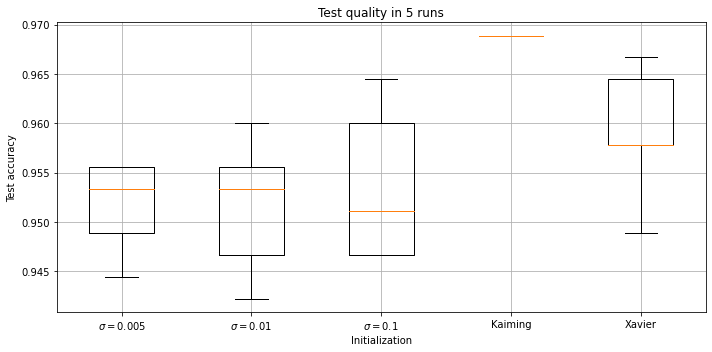

In [68]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [69]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [70]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [71]:
### your code here

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

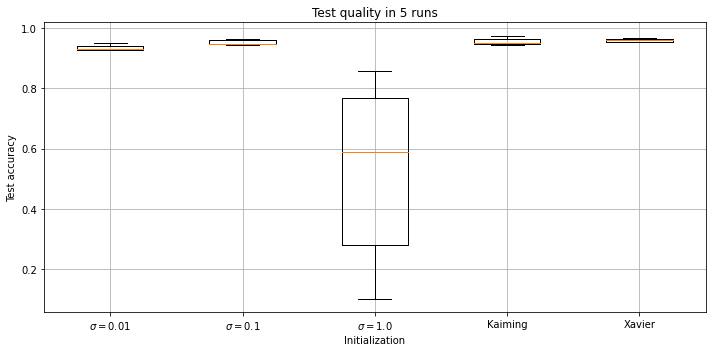

In [72]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

...

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [75]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [76]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [77]:
### your code here

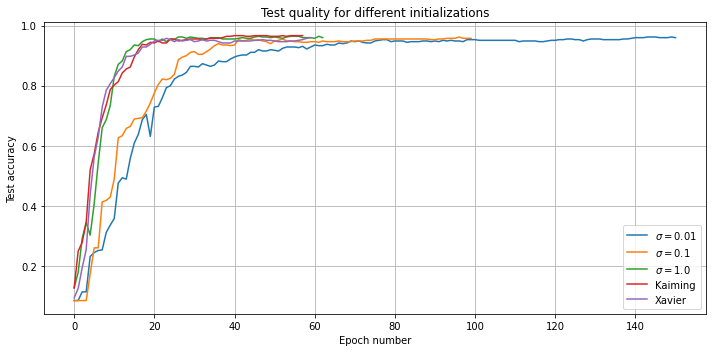

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

...

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [250]:
class Tanh(Layer):
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.cosh = np.cosh(input)
        return np.sinh(input) / self.cosh

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return -grad_output / np.power(self.cosh, 2)

    def __repr__(self):
        return 'Tanh()'

In [252]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters
        self.output = None

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return self.output * (1 - self.output) * grad_output

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [270]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [271]:
accs_train = np.zeros((3, 15))
accs_test = np.zeros_like(accs_train)
layer_c = 3

In [274]:
np.random.seed(42)

for i, (act_func, init_strategy) in enumerate(zip(act_func_vars, init_for_act_funcs)):
    for j in range(accs_train.shape[1]):
        # print(f"{i=}\t{act_func=}\t{init_strategy=}")
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, init_strategy)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Mean abs grad value: 0.1519042272644466	Max abs grad value: 3.1537356629019677
Loss = 5.8614742091231316
Mean abs grad value: 0.12568795940107938	Max abs grad value: 5.915254833472159
Loss = 5.70642928251628
Train accuracy: 0.134		Test accuracy: 0.136
Mean abs grad value: 0.054084907137489834	Max abs grad value: 2.008558067429515
Loss = 2.9757831980510807
Train accuracy: 0.167		Test accuracy: 0.173
Mean abs grad value: 0.04109775199329811	Max abs grad value: 1.8231817211986014
Loss = 2.525099619323295
Train accuracy: 0.202		Test accuracy: 0.216
Mean abs grad value: 0.029173323654317147	Max abs grad value: 1.225986950098017
Loss = 2.139121608801196
Train accuracy: 0.260		Test accuracy: 0.247
Mean abs grad value: 0.022640410399852987	Max abs grad value: 0.6657375058569639
Loss = 1.7297394539102124
Train accuracy: 0.413		Test accuracy: 0.384
Mean abs grad value: 0.014887910011935701	Max abs grad value: 0.33296022422133315
Loss = 1.509824047958296
Train accuracy: 0.509		Test accuracy: 0.49

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

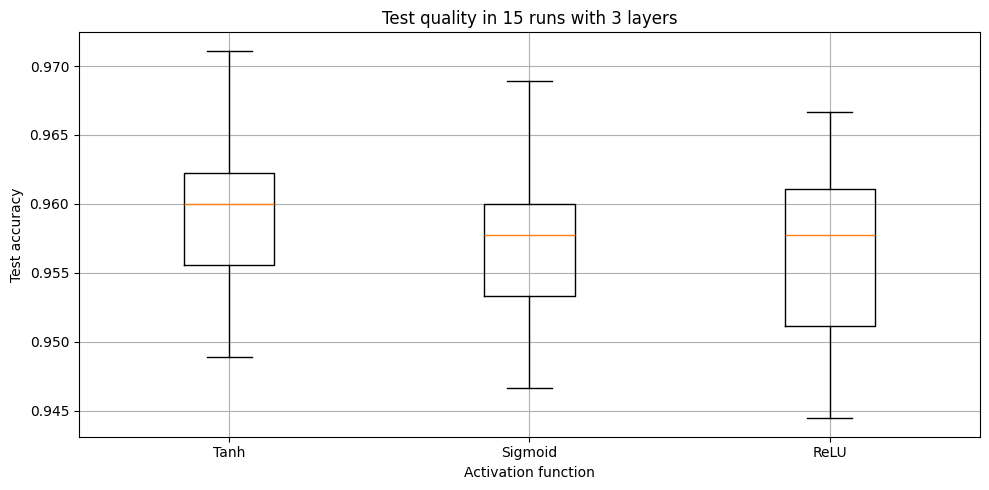

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title(f"Test quality in {accs_train.shape[1]} runs with {layer_c} layers")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

При использовании в качестве функций активации сигмоиды и гиперболического тангенса среднее качество оказывается сравнимым. Однако, дисперсия при использовании сигмоиды оказывается выше. 
При использовании ReLU среднее качество оказывается ниже.

Преимущества ReLU не реализуются при малом количестве слоев (3), так как затухание градиентов оказывается незначительным. 
Для проверки данной гипотезы будет поставлен *дополнительный* эксперимент с количеством слоев = 5

In [276]:
accs_train = np.zeros((3, 15))
accs_test = np.zeros_like(accs_train)
layer_c = 10

In [277]:
np.random.seed(42)

for i, (act_func, init_strategy) in enumerate(zip(act_func_vars, init_for_act_funcs)):
    for j in range(accs_train.shape[1]):
        # print(f"{i=}\t{act_func=}\t{init_strategy=}")
        network = make_network(input_size, 32, output_size, layer_c, ReLU)
        initialize_network(network, init_strategy)
        network, cb = train_network(network, history=True)
        
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Mean abs grad value: 0.010177889582543988	Max abs grad value: 0.21322589885188944
Loss = 2.517919316551229
Mean abs grad value: 0.0008808215884058125	Max abs grad value: 0.02834583332118
Loss = 2.306029051672841
Train accuracy: 0.092		Test accuracy: 0.098
Mean abs grad value: 0.0008526752966109202	Max abs grad value: 0.02469291523086479
Loss = 2.2930696087627327
Train accuracy: 0.141		Test accuracy: 0.171
Mean abs grad value: 0.0012295684498715407	Max abs grad value: 0.06351812269973438
Loss = 2.2727014103302485
Train accuracy: 0.135		Test accuracy: 0.158
Mean abs grad value: 0.0023313275019690377	Max abs grad value: 0.07935382845978507
Loss = 2.2358443100394196
Train accuracy: 0.167		Test accuracy: 0.164
Mean abs grad value: 0.0053346590737826695	Max abs grad value: 0.22175143121892976
Loss = 2.2220148017226817
Mean abs grad value: 0.00312920900964925	Max abs grad value: 0.08460984410686168
Loss = 2.2099474089723308
Train accuracy: 0.180		Test accuracy: 0.167
Mean abs grad value: 0.01

C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:29: RuntimeWarning: overflow encountered in exp
  exp_arr = np.exp(self.input)
C:\Users\s0221\AppData\Local\Temp\ipykernel_2800\3318986900.py:34: RuntimeWarning: invalid value encountered in multiply
  d_loss_d_x = grad_output - exp_arr * (grad_output_sum / exp_sum)


Train accuracy: 0.874		Test accuracy: 0.842
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = nan
Mean abs grad value: nan	Max abs grad value: nan
Loss = 

RuntimeError: Optimization failure: ABNORMAL_TERMINATION_IN_LNSRCH

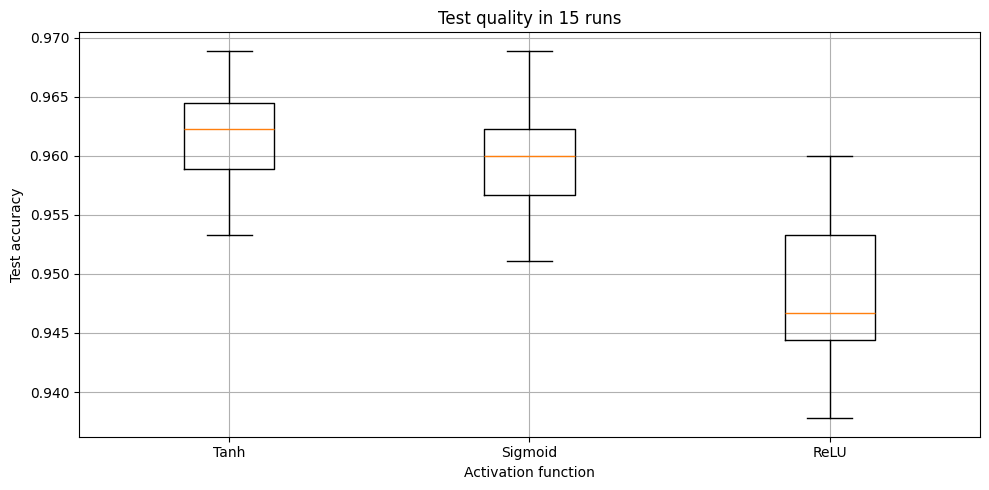

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax.set_title(f"Test quality in {accs_train.shape[1]} runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [ ]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    # your code is here

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [ ]:
# your code is here

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [ ]:
# your code is here

**Выводы:**

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.